In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
from sklearn.model_selection import KFold
import statistics
import itertools


%matplotlib inline

In [2]:
df = pd.read_csv('./cleaned_dataset.csv')

In [3]:
df.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.columns

Index(['id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'epithelial_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
       'class'],
      dtype='object')

In [5]:
df.to_csv('modified.csv', header=False, index=False)

In [6]:
df = pd.read_csv('modified.csv', header=None)

In [7]:
df = df.drop([0], axis=1)

In [8]:
def accuracy(y_label, y_pred):
    correct = 0
    for i in range(len(y_label)):
        if(y_label[i]==y_pred[i]):
            correct = correct + 1
    return (correct/len(y_label))*100

In [9]:
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [10]:
def mean(acc):
    sum = 0
    for i in acc:
        sum = sum + i
    return sum/len(acc)

In [11]:
def mode(labels):
    return Counter(labels).most_common(1)[0][0]

In [12]:
def knn(X_train, y_train, query, k):
    neighbor_distances_and_indices = []
    
    for index, example in enumerate(X_train):
        distance = euclidean_distance(example, query)
        neighbor_distances_and_indices.append((distance, index))
    
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    k_nearest_labels = [y_train[i] for distance, i in k_nearest_distances_and_indices]
    
    return mode(k_nearest_labels)

In [13]:
def knn_classifier(X_train, y_train, X_test, y_test, k):
    y_pred = []
    for i in range(len(X_test)):
        clf_query = X_test[i]
        clf_prediction = knn(X_train, y_train, clf_query, k)
        y_pred.append(clf_prediction)
        
    return accuracy(y_test, y_pred)

In [14]:
def cross_validation_model(k):
    
    cv = []
    
    kf = KFold(n_splits=6)
    kf.get_n_splits(df)

    X = np.array(df)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_test = X_test[:, 9:]
        X_test = X_test[:, :-1]
        y_train = X_train[:, 9:]
        X_train = X_train[:, :-1]

        X_test = X_test.tolist()
        X_train = X_train.tolist()
        y_train = y_train.tolist()
        y_test = y_test.tolist()

        y_test = list(itertools.chain.from_iterable(y_test))
        y_train = list(itertools.chain.from_iterable(y_train))

        cv.append(knn_classifier(X_train, y_train, X_test, y_test, k))
        
    
    return mean(cv)

In [16]:
optimal_k = []

for k in range(1, 20):
    optimal_k.append(100 - cross_validation_model(k))

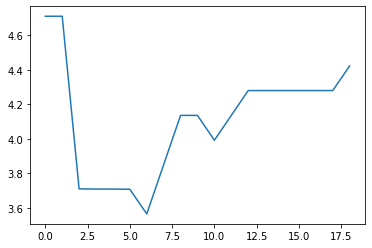

In [17]:
plt.plot(optimal_k)

In [20]:
minpos = optimal_k.index(min(optimal_k))

In [19]:
minpos

6

In [21]:
cross_validation_model(6)

96.2913842224187